In [10]:
##讀檔案
import csv
timeseries=[]
dateseries=[]

################要改檔名、做資料擷取################
with open('HK54t.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        if row[1] != 'null' and row[1] != '':
            timeseries.append(float(row[1]))
            dateseries.append((row[0]))

In [11]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False

In [27]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname='simHei',size=1)

def runTest(runNumber,TimeSeires,Name):
    sTest = StationarityTests()
    length=len(TimeSeires)
#舉例
#每20筆資料跑一次
#5174筆 跑5174-19=5155次
    time=length-(runNumber-1)
    dictcount={}
    day=[]
    for i in range(length):
        dictcount[i]=0
        day.append(i)

    for k in range(time):
        sTest.ADF_Stationarity_Test(timeseries[k:k+runNumber], printResults = True)
        if sTest.isStationary==False:
            for i in range(k,k+runNumber):
                dictcount[i]+=1
    max_x=[]
    max_y=[]
    
    for key,value in dictcount.items():
        if value==runNumber:
            max_x.append(key)
            max_y.append(timeseries[key])
            
    k=len(dictcount)- runNumber+1 
    for i in range(1,runNumber):
        if dictcount[k] == runNumber-i: 
            max_x.append(k)
            max_y.append(timeseries[k])
        k+=1    
            
    plt.figure(figsize=(50,10),dpi=100,linewidth = 3)
    plt.plot(day,timeseries,ls = 'solid',lw = '1',color = 'B', label=Name)
    plt.scatter(max_x,max_y,color = 'R')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel("date", fontsize=0.01, labelpad = 0.01)
    plt.ylabel(Name, fontsize=30, labelpad = 20)
    plt.legend(loc = "best", fontsize=20)
    plt.show()   
    plt.savefig('CPI.jpg', dpi=95, optimize=True, progressive=True) 

    result_list=[]
    for i in max_x:
        if i == max_x[0]:
            current_number=i
            last_number=i 
        elif i - last_number == 1:
            last_number=i   
        else:
            if current_number==last_number:
                result_list.append(dateseries[current_number])
            else:
                result_list.append(dateseries[current_number]+'~'+dateseries[last_number])
            current_number=i
            last_number=i       
        if i == max_x[-1]:
            if current_number==last_number:
                result_list.append(dateseries[current_number])
            else:
                result_list.append(dateseries[current_number]+'~'+dateseries[last_number])
    print(result_list)
       
        

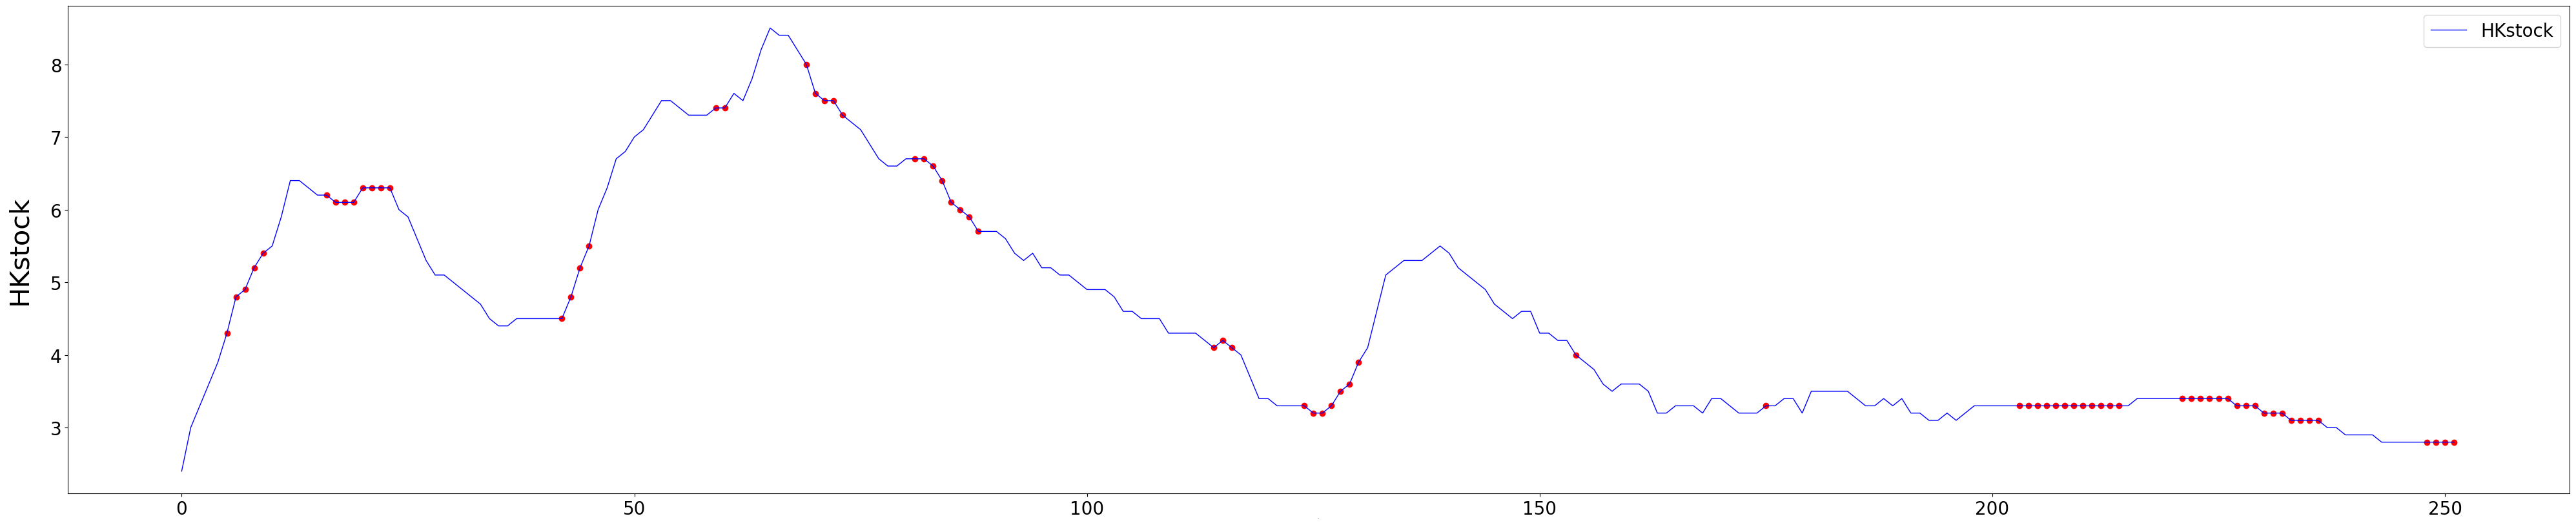

['1998/6/1~1998/10/1', '1999/5/1~1999/12/1', '2001/7/1~2001/10/1', '2002/12/1~2003/1/1', '2003/10/1~2004/2/1', '2004/10/1~2005/5/1', '2007/7/1~2007/9/1', '2008/5/1~2008/11/1', '2010/11/1', '2012/8/1', '2014/12/1~2015/11/1', '2016/6/1~2017/9/1', '2018/9/1~2018/12/1']


<Figure size 432x288 with 0 Axes>

In [28]:
runTest(6,timeseries,'HKstock')